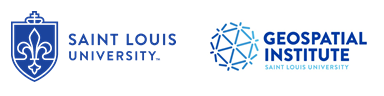

# Assignment 05: Deep Neural Networks in Keras (Part 2A)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Preprocess geospatial data for LULC classification

# IMPORTANT

## If you are using Google Colab
Whenever you want to keep a copy of this notebook, remember to sign in with your appropriate google account (SLU Google Account is suggested), and save a copy of it in your preferred Google Drive location (preferable location is a seperate folder in your Google Drive for seperate projects, also avoid spaces in folder/file names). Remember to utilize GPU runtime (if needs to use keras). Also remember to pip install necessary packages in every runtime (if needed).

## If you are using Jupyter Notebook
Remember to activate your necessary environment before running codes. Only use Jupyter Notebooks if you are in the lab. If you don't have a GPU machine, then Colab free GPU is suggested.

# How to submit?
Write your answers in code cells with necessary comments. Save a copy of this notebook in your Google Drive / Local Drive by replacing the STUDENT with your SURNAME in CAPS. Upload the completed notebook(s) in Canvas.



---



---



# Data

The dataset for Lab 5 is similar to what you used in Lab 3. Go to the <code>data</code> directory where you will find the following datasets:
```
-- data
  -- Sentinel2B_N0212R126_20190625.tif
  -- lulc_ground_truth.shp
```

The Sentinel 2B imagery was a scene near the Saint Louis City and East Saint Louis region collected on June 25th of 2019. The following map shows the data extent and a snippet of each bands:


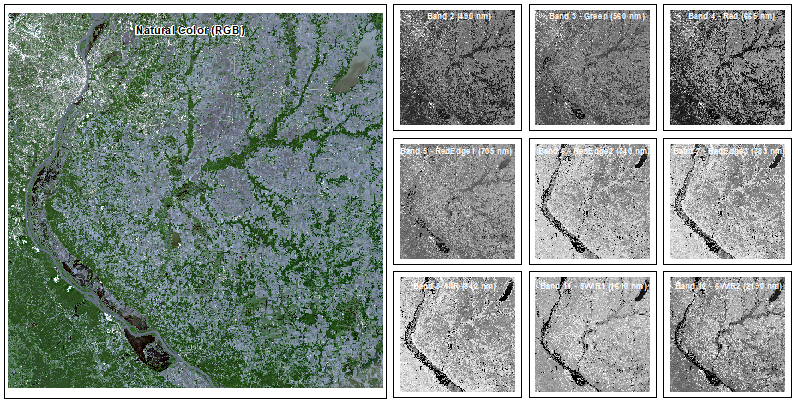

Here is a more detailed information on what each band represents in the order:
1. Index 0 - Band 2 - Blue - 490 nm
2. Index 1 - Band 3 - Green - 560 nm
3. Index 2 - Band 4 - Red - 665 nm
4. Index 3 - Band 5 - Red Edge 1 - 705 nm
5. Index 4 - Band 6 - Red Edge 2 - 740 nm
6. Index 5 - Band 7 - Red Edge 3 - 783 nm
7. Index 6 - Band 8 - NIR - 842 nm
8. Index 7 - Band 11 - SWIR 1 - 1610 nm
9. Index 8 - Band 12 - SWIR 2 - 2190 nm

The raster data has 9 bands, each band representing the surface reflectance at that corresponding wavelength (given above). The raster has a 20 m spatial resolution.

Additionally, ground truth data for the LULC has been given in <code>lulc_ground_truth.shp</code> shapefile. The shapefile has 10,000 features (samples/rows) with two unique information, a UID (unique id) and label. It looks like below:

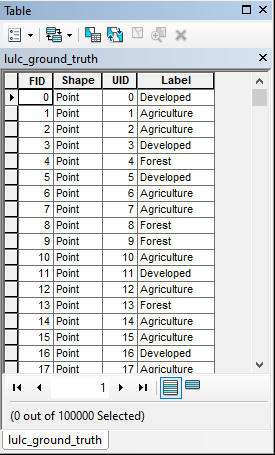

There are total 8 unique classes in the shapefile. The number of samples per class is not uniform.

# Your Tasks

1. Read the raster data using <code>rasterio</code> and shapefile using <code>geopandas</code>.
2. Use the <code>extract_pixel_value_from_point</code> function provided in Lab 3 to get reflectance values for all 9 bands for all 10,000 points.
3. Save the reflectance values as csv in your Google Drive folder (if using colab) or local folder (if using jupyter notebook) for future use.
4. Save the shapefile geopandas dataframe as a csv as well locally. 
5. Answer following questions in a word document (name it *lab_5_Part2A_Answers_SURNAME.docx*): (**Attach the codes you used as well, you can use screenshots**)  
    5.1. What are the unique LULC classes you have in the ground truth data?  
    5.2. How many samples for each class are there in the ground truth data? Create a bar plot of the frequency for each class.


**Important Hints**
- Remember to deal with nodata.
- The sentinel dataset is also stored as 16-bit. So you should divide the reflectance values by the maximum limit of the 16-bit datatype.
- When you are extracting pixel value from point, you should remember to change code wherever necessary. (Bonus Hint: The name of columns will be different here).

# Deliverables
1. The codes for the tasks in thie notebook. (<code>a5_deep_neural_networks_Part2A_STUDENT.ipynb</code>)
2. Two csv files for the extracted reflectance and ground turth data
3. The word document file with answers (<code>lab_5_Part2A_Answers_SURNAME.docx</code>)



---



---



# Your Turn

In [1]:
import os
print(os.getcwd())


C:\Users\syed_


In [2]:
new_directory = r"C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\lab5\data"

In [3]:
os.chdir(new_directory)

In [4]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
import geopandas as gpd


In [11]:
src = rasterio.open(r'C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\lab5\data\Sentinel2B_N0212R126_20190625.tif')
# Assume img is the loaded image data
img = src.read()


In [12]:
img = img.astype(float)
img[img == np.float32(src.nodata)] = np.nan
print(type(img))
img = img/65536

<class 'numpy.ndarray'>


In [10]:
# Load the shapefile
points = gpd.read_file(r'C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\lab5\data\lulc_ground_truth.shp')



In [14]:
#extract the values from each point

def extract_pixel_value_from_point(point_shape, image_src, image_np):

    """
    Extracts the pixel value(s) from a given point shapefile and
    a numpy geospatial image.

    Arguments:
        - point_shape: A geopandas dataframe containing the point
            feature. It must have a UID specified which indicates
            an unique ID.
        - image_src: A rasterio source. The reference system of
            both shapefile and image has to match with each other.
        - image_np: A np.ndarray version of the rasterio image.
            The array should be free from nodata values.

    Returns:
        - values_df: A pandas dataframe containing the UID and
            associated pixel value(s).
    """

    # Empty dictionary to hold all the pixel values
    values_dict = {}

    # Loop through each point feature and populate the dict
    for i, point in enumerate(point_shape['geometry']):

        # Get the x and y coordinate
        x = point.xy[0][0]
        y = point.xy[1][0]

        # Get the associated row col number
        # based on the coordinate
        row, col = image_src.index(x, y)
        values = image_np[:, row, col]

        # Get the UID
        uid = point_shape.iloc[i, 0]

        # Populate the dictionary
        values_dict[uid] = values

    # Convert the dictionary to a pd dataframe
    values_df = pd.DataFrame(values_dict).T
    # Reset the index of the df
    values_df.reset_index(inplace=True)
    # Change the column names
    values_df.columns = ['UID', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8', 'B9']

    return values_df

# Apply the function
reflectance = extract_pixel_value_from_point(points, src, img)
reflectance

,UID,B1,B2,B3,B4,B5,B6,B7,B8,B9
0,0,0.010742,0.014450,0.012955,0.019760,0.039444,0.048141,0.053299,0.035660,0.022690
1,1,0.010147,0.014801,0.015106,0.022827,0.032791,0.037399,0.040543,0.041458,0.026901
2,2,0.012543,0.016098,0.021454,0.026505,0.029999,0.032837,0.037964,0.055222,0.040756
3,3,0.007278,0.012253,0.014145,0.022614,0.045715,0.053421,0.056290,0.035995,0.019882
4,4,0.001968,0.004105,0.001984,0.008255,0.039932,0.054398,0.058777,0.027054,0.011398
...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.011017,0.014786,0.019531,0.025436,0.028946,0.033203,0.037491,0.054993,0.041351
99996,99996,0.009476,0.013092,0.018127,0.022690,0.026978,0.029800,0.034119,0.039246,0.026138
99997,99997,0.011948,0.015900,0.021133,0.025696,0.030884,0.033188,0.037689,0.043701,0.031860
99998,99998,0.007294,0.010193,0.012665,0.013550,0.008438,0.008270,0.005829,0.000748,0.000900


In [15]:
# Save the reflectance DataFrame to a CSV file
reflectance.to_csv('reflectance_values.csv', index=False)



In [16]:
# Save the GeoPandas DataFrame to a CSV file
points.to_csv('shapefile_data.csv', index=False)



In [17]:
# Joining
data = reflectance.join(points, on='UID', rsuffix='_')
data

,UID,B1,B2,B3,B4,B5,B6,B7,B8,B9,UID_,Label,geometry
0,0,0.010742,0.014450,0.012955,0.019760,0.039444,0.048141,0.053299,0.035660,0.022690,0,Developed,POINT (303242.326 4213611.454)
1,1,0.010147,0.014801,0.015106,0.022827,0.032791,0.037399,0.040543,0.041458,0.026901,1,Agriculture,POINT (292930.348 4296054.513)
2,2,0.012543,0.016098,0.021454,0.026505,0.029999,0.032837,0.037964,0.055222,0.040756,2,Agriculture,POINT (265203.800 4269581.511)
3,3,0.007278,0.012253,0.014145,0.022614,0.045715,0.053421,0.056290,0.035995,0.019882,3,Developed,POINT (238300.425 4296996.469)
4,4,0.001968,0.004105,0.001984,0.008255,0.039932,0.054398,0.058777,0.027054,0.011398,4,Forest,POINT (304097.171 4211128.006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.011017,0.014786,0.019531,0.025436,0.028946,0.033203,0.037491,0.054993,0.041351,99995,Agriculture,POINT (239809.033 4262490.196)
99996,99996,0.009476,0.013092,0.018127,0.022690,0.026978,0.029800,0.034119,0.039246,0.026138,99996,Agriculture,POINT (275318.089 4217774.322)
99997,99997,0.011948,0.015900,0.021133,0.025696,0.030884,0.033188,0.037689,0.043701,0.031860,99997,Agriculture,POINT (240998.394 4257075.880)
99998,99998,0.007294,0.010193,0.012665,0.013550,0.008438,0.008270,0.005829,0.000748,0.000900,99998,Water,POINT (250105.713 4198845.182)


In [18]:
# Save the reflectance DataFrame to a CSV file
data.to_csv('joined_data.csv', index=False)



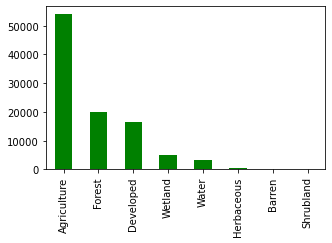

In [19]:
#create bar graph
counts = data['Label'].value_counts().plot(kind='bar', figsize = (5,3), color = 'Green')


plt.show()

In [20]:
#count the samples per class
counts = data['Label'].value_counts()
print(counts)

Agriculture    54035
Forest         20070
Developed      16513
Wetland         5040
Water           3399
Herbaceous       592
Barren           233
Shrubland        118
Name: Label, dtype: int64
